<a href="https://colab.research.google.com/github/mars241/Machine-Learning/blob/main/AAM_WCS_4_4_ML_Pipeline_ACP/PCA(Principal_Components_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TOPO/COURS

**l'ACP(Analyse en Composantes Principales)** ou en anglais **PCA (Principal Components Analysis)**

PCA est un algorithme de réduction de dimmension, qui a la capacité de réunir en amont de l'entraînement les informations les plus importantes dans peu de features.

Cette technique permet:

Un gain de temps (moins de features à entraîner)
Un gain d'espace (les informations les plus importantes se retrouves compréssé dans moins de features, plutôt que d'être séparer dans pleins de colonnes).

L'objectif de PCA est de trouver la meilleure "combinaison linéaire" de caractéristiques/colonnes qui représentent le mieux la structure sous-jacente des données.

**La malédiction de la dimmensionnalité**

À mesure que le nombre de caractéristiques ou de dimensions augmente, la quantité de données dont nous avons besoin pour généraliser avec précision croît de manière exponentielle,

PCA permet de contourner la malédiction de la dimmensionnalité, car cette technique permet de condenser les informations pertinentes qui sont répartis entre toutes les features (les dimmensions) dans très peu de feature (par exemple 2 features).

**Collinéarité entre features**

La collinéarité entre deux features (différentes de y) induit inévitablement de la redondance d'information.
La colinéarité entre features va favoriser l'ajout de bruit autour d'une feature, donc c'est à bannir.

**Combinaison linéaire**

Le principe de PCA, c'est qu'il va trouver la meilleure combinaison linéaire possible de nos features, en créant de nouvelles features, à partir de nos features déjà existantes.

Deux Conséquence du PCA :

1. Cet algorithme va d'une part, casser toute colinéarité, donc tout les nouvelles features ne sauront pas du tout corrélé entre elles.

2. PCA va aussi ranger ses nouvelles features, par ordre d'importance. X1' est porteur de plus d'informations, que X2', que X3', et ainsi de suite...

Afin de cassé toute colinéarité entre nos features, le principe de PCA est le suivant:
Projeter nos données sur des axes appelés "Composantes Principales".
On réduit le nombre de dimmensions de notre dataset tout en préservant un maximum de variance.

Si nous ne devions garder que deux dimensions pour décrire nos données, ces dimensions devrait:

1. Préserver la plus grande partie de la variance des données lorsqu'elles sont projetées sur elle (dispersion des points rouges)
2. minimiser les "erreurs de reconstruction" (lignes rouges)

#🦾 Challenge : Réduisez les tous : ACP !

# Objectifs


>   S'initier au concept de l'ACP

>   Savoir effectuer un ACP avec scikit-learn

# Concept

Analyse en Composantes Principales (**ACP) est un algorithme de machine learning non-supervisé dont le but est notamment de réduire à l'essentiel le nombre de dimensions (variables)**. Il s'agit même de la méthode de réduction de dimension la plus utilisée. Elle utilise la décomposition en valeurs singulières.

Réduire le nombre de variables permet :

de simplifier les visualisations
de réduire les coûts nécessaires pour calculer, stocker, produire les données
d'améliorer les performances des algorithmes de machine learning en réduisant le bruit (outlier, valeurs très grandes ou très petites) dans les données
Et bien d'autres choses

l'objectif principal de l'**ACP est d'essayer de tenir compte de la variance maximale de l'ensemble de données normalisées par le biais de composantes principales**.



# Dans ce challenge, 
tu vas repartir du dataset de la météo. Tu trouveras [le fichier ici](https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv).

Crée-toi un notebook et réalise les tâches ci-dessous. Une fois terminé, mets en commentaire le lien de ton notebook consultable N'oublie pas d'effectuer des visualisations et de commenter ton code, toujours utiles pour comprendre un dataset.

1. Charge le dataset et mène une analyse exploratoire : le nombre de features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...
2. Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser *la méthode .select_dtypes(include='number')* pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne *OPINION*. Tu nommeras ce slice y.
3. Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans X_scaled, qui doit également avoir 366 lignes et 22 colonnes.
4. Instancie un objet pca, et entraine-le sur tes données standardisées.
5. Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut *pca.explained_variance_ratio_*. Et 80% ?
6. Transforme tes données grâce à *pca.fit_transform(X_scaled)*, et stocke le résultat dans *X_pca*. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque *OPINION*. Tu devrais obtenir un graphique de ce type :

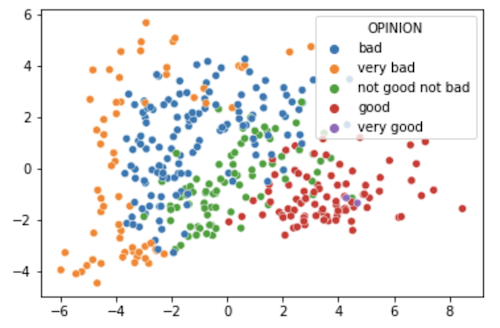

7. Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv')
df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,...,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,...,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,...,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,...,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,...,3,116,116,116,0,1,8.7,very bad,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,10,9,48,9,10,7,24.3,86,8.125,...,5,176,302,299,0,2,3.3,very bad,12,27
362,2020-12-28,8,4,41,4,8,6,9.4,84,9.250,...,0,176,299,353,0,2,3.3,very bad,12,28
363,2020-12-29,8,4,17,4,7,5,1.8,91,9.500,...,0,176,116,353,0,2,8.7,very bad,12,29
364,2020-12-30,7,3,18,3,6,5,1.2,91,9.875,...,-1,116,116,122,0,2,6.9,very bad,12,30


1. Charge le dataset et mène une analyse exploratoire : le nombre de features, les corrélations dans les données, les indicateurs statistiques (de position, de dispersion)...

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

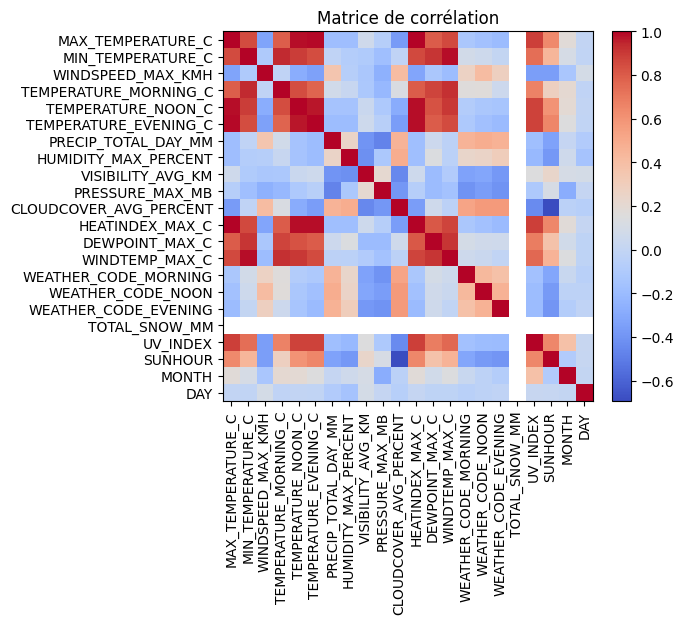

In [9]:
# les corrélations dans les données:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes numériques
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Créer la matrice de corrélation
corr = df[numeric_cols].corr()

# Créer la heatmap
heatmap = plt.imshow(corr, cmap='coolwarm', interpolation='nearest')

# Ajouter une légende à la barre de couleurs
plt.colorbar(heatmap, fraction=0.046, pad=0.04)

# Ajouter un titre et des étiquettes d'axe
plt.title('Matrice de corrélation')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols, rotation=0)
plt.show()

## RMQ :Il existe des corrélation fortement positive entre certaines features. 
# Il y a donc une redondance de l'information. PCA permet d'extraire la variance au maximum dans ce jeu de données.


In [11]:
#  les indicateurs statistiques (de position, de dispersion)...
# Description statistique de toutes les données (Plus complet) <=> + unique, top & freq
df.describe(include='all')

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
count,366,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366,366.000000,366.000000
unique,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN
top,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bad,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN,NaN
mean,NaN,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,...,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,NaN,6.513661,15.756831
std,NaN,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,...,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,NaN,3.455958,8.823592
min,NaN,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,...,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,NaN,1.000000,1.000000
25%,NaN,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,...,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,NaN,4.000000,8.000000
50%,NaN,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,...,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,NaN,7.000000,16.000000
75%,NaN,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,...,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,NaN,9.750000,23.000000


In [12]:
# Liste des colonnes mésurables/numéquiques
df.describe().columns


Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'MONTH', 'DAY'],
      dtype='object')

2. Crée un slice du dataset avec uniquement les colonnes numériques (tu peux utiliser la méthode .select_dtypes(include='number') pour t'aider). Tu nommeras ce slice : X. Ce slice X doit avoir 366 lignes et 22 colonnes. Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.

In [15]:
# créer un slice du dataset avec uniquement les colonnes numériques :
X = df.select_dtypes(include='number')
X.shape

(366, 22)

In [17]:
# Crée un second slice avec uniquement la colonne OPINION. Tu nommeras ce slice y.
y = df[['OPINION']]
y

,OPINION
0,bad
1,bad
2,bad
3,very bad
4,very bad
...,...
361,very bad
362,very bad
363,very bad
364,very bad


In [18]:
# les différents valeurs que contient la colonne 'OPINION'
df['OPINION'].unique()

array(['bad', 'very bad', 'not good not bad', 'good', 'very good'],
      dtype=object)

3. Utilise un scaler pour mettre à l'échelle tes données. Tu transformeras tes données avec ce scaler, et tu enregistreras les données mises à l'échelle dans X_scaled, qui doit également avoir 366 lignes et 22 colonnes.

In [19]:
#⚠️ Il est préférable que les données soient centrées sur la moyenne de leur caractéristique (Standardisation des données) avant d'appliquer l'ACP
# 1er ETAPE de l'ACP: Standardisation

# import pour de la bibliothèque de la Standardisation
from sklearn.preprocessing import StandardScaler

# instancier le scaler
scaler = StandardScaler()

# transformer les données avec le scaler
X_scaled = scaler.fit_transform(X)

# vérifier les dimensions du "X_scaled"
X_scaled.shape

(366, 22)

In [22]:
# Voir le résultat de standardisation du "X_scaled"
X_scaled

array([[-9.42888815e-01, -2.79623021e-01, -1.05353586e+00, ...,
        -1.75850764e+00, -1.59759128e+00, -1.67471838e+00],
       [-7.85669085e-01, -5.01623077e-01,  9.60379088e-04, ...,
        -1.75850764e+00, -1.59759128e+00, -1.56123070e+00],
       [-7.85669085e-01, -2.79623021e-01,  3.52459125e-01, ...,
        -1.22822667e+00, -1.59759128e+00, -1.44774303e+00],
       ...,
       [-1.41454800e+00, -1.61162336e+00, -4.67704616e-01, ...,
        -1.67664732e-01,  1.58967457e+00,  1.50293649e+00],
       [-1.57176773e+00, -1.83362341e+00, -3.50538367e-01, ...,
        -6.97945700e-01,  1.58967457e+00,  1.61642416e+00],
       [-1.57176773e+00, -1.38962330e+00,  2.35292877e-01, ...,
        -1.75850764e+00,  1.58967457e+00,  1.72991184e+00]])

In [21]:
# Autrement avec au préalable une numérisation de la variable:
# Mise en forme de la données non numérique avec la méthode FACTORIZE
df['OPINION_NUM'] = df['OPINION'].factorize()[0]
df['OPINION_NUM'].unique()

array([0, 1, 2, 3, 4])

In [23]:
# Vérifier l'ajout de la colonne 'OPINION_NUM' dans le DF
df.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY', 'OPINION_NUM'],
      dtype='object')

In [24]:
# Drop la colonne qui vient d'être créer, pour ne pas fausser les résultats !
# " inplace=True " c'est pour acter la modification, sinon cela reste une vue.
df.drop('OPINION_NUM', axis=1, inplace=True)

In [25]:
df.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')

4. Instancie un objet pca, et entraine-le sur tes données standardisées.

In [26]:
# Préliminaires: Dimensions des données standardisées
X_scaled.shape

(366, 22)

In [39]:
# 2eme ETAPE de l'ACP : Entrainement du modèle PCA sur les données standardisées 
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit(X_scaled)

X_pca

# RMQ : En entraînant PCA sans signifier de valeur (de création du dataset) pour l'hyperparamètre 'n_components', on a alors 22 PCA components, car 22 colonnes/caractéristiques.

PCA()

5. Combien de composantes principales expliquent au moins 70% de la variance ? Tu peux t'aider de l'attribut pca.explained_variance_ratio_. Et 80% ?

In [42]:
# Voir la variance du "pca" de l'entrainement du modèle APC avec les 22 PCA components
pca.explained_variance_ratio_

# RMQ : Les deux premières composantes principales contiennent + de 50% de la variance expliquée.

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 1.81975769e-38])

In [44]:
# caclule de l'écart type
# La fonction std() est une méthode de l'objet NumPy qui permet de calculer l'écart type (standard deviation en anglais) d'un ensemble de valeurs numériques en Python.
# L'écart type est une mesure de la dispersion des valeurs par rapport à leur moyenne.

pca.explained_variance_ratio_.std()

0.09076649891257721

In [45]:
# Autrement 2eme ETAPE de l'ACP: Entrainement du modèle PCA et création du dataset(avec 2 fois moins de dimensions que 22 colonnes)
from sklearn.decomposition import PCA

pca_2x = PCA(n_components=11)
X_pca_2 = pca_2x.fit_transform(X_scaled)

# Dataset dimension
X_pca_2.shape 

# NB :Nous pouvons utiliser ce nouveau dataset pour des visualisations ou pour du Machine Learning.

(366, 11)

In [53]:
# Autrement et mieux pour calcule de la variance :
from sklearn.decomposition import PCA
pca_2x = PCA(n_components=11)
X_pca_2 = pca_2x.fit_transform(X_scaled)

pca_2x.explained_variance_ratio_.round(3)

# RMQ : --> avec les 4 premières composantes, on arrive à attendre les 70% de variance expliquée du set total.
# --> avec les 6 premières on atteind les 80%

array([0.41 , 0.209, 0.064, 0.06 , 0.046, 0.039, 0.03 , 0.028, 0.025,
       0.022, 0.021])

<Axes: >

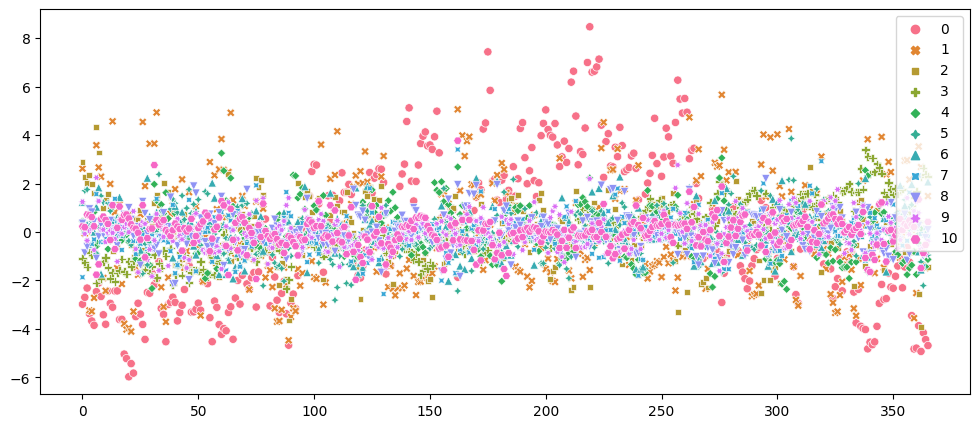

In [48]:
# Visualisation du "X_pca" avec les 11 PCA components

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))

sns.scatterplot(data = X_pca_2)


In [50]:
# PCA.transform() ne fait rien d'autre qu'une combinaison linéaire de chacune des 366 jours d'enregistrements (dans le DF METEO) et des Composantes Principales
Xp = pca.transform(X)

# Générer une liste d'étiquettes de colonnes basée sur le nombre de colonnes dans Xp, qui est au nombre de 22 
X_projection = pd.DataFrame(Xp, columns=[f'JOUR{i}' for i in range(1, Xp.shape[1] + 1)])

X_projection

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,JOUR1,JOUR2,JOUR3,JOUR4,JOUR5,JOUR6,JOUR7,JOUR8,JOUR9,JOUR10,...,JOUR13,JOUR14,JOUR15,JOUR16,JOUR17,JOUR18,JOUR19,JOUR20,JOUR21,JOUR22
0,-69.694716,72.213477,313.679940,-345.269786,-234.034496,243.596788,178.138136,-152.914329,390.615507,587.557962,...,-119.514454,217.390397,-37.286571,80.962749,-58.681571,-35.329645,11.779465,-17.063484,-1.302840,-7.845957e-15
1,-35.653716,-116.061586,346.724933,-332.960307,-264.580746,298.875788,124.104215,40.553292,322.833504,469.591994,...,-113.037466,251.558109,-28.123668,57.985301,-63.446079,-35.154834,9.406640,-18.622586,-2.861486,-7.136574e-15
2,-38.275264,-89.660751,341.287120,-334.493509,-257.563918,278.835479,141.648714,-1.972514,314.082853,490.679428,...,-115.428678,234.998577,-32.482297,60.860180,-59.940805,-33.699120,9.262038,-17.780982,-2.162559,-6.845688e-15
3,-30.219960,-164.750618,347.478498,-327.880155,-251.335567,274.110112,123.548056,51.815309,340.356846,475.608641,...,-113.475985,195.695794,-28.359654,60.926395,-53.064313,-29.790341,5.722187,-18.237385,-0.624915,-4.405941e-15
4,-32.545308,-161.902176,344.864229,-329.050374,-252.049050,275.654380,125.936550,51.074901,338.466527,476.105368,...,-113.288399,200.915344,-27.932933,60.704260,-54.420951,-30.124141,6.255864,-17.308117,-1.161718,-4.904130e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-69.259470,30.604523,278.919537,-355.007264,-258.047649,266.606799,51.400489,-41.469579,430.231987,558.555467,...,-119.590587,227.996538,-39.451850,82.646169,-64.042358,-34.274304,10.402160,-19.548535,-1.944084,-7.254089e-15
362,-75.800412,39.440634,268.780732,-343.777790,-250.475692,238.177777,21.781389,-79.793390,412.791949,565.900606,...,-116.392115,206.463015,-42.534897,85.098444,-57.952371,-30.223916,10.086075,-18.366940,-1.191694,-6.985225e-15
363,-59.663362,-37.914362,313.859258,-323.608409,-263.871476,203.208314,51.939944,-94.662497,285.317374,541.679536,...,-127.124264,212.085216,-50.556897,71.570732,-52.551522,-26.090249,12.286773,-17.200016,-2.242471,-7.610263e-15
364,-42.704908,-134.177030,325.461480,-316.984023,-275.058816,269.473293,120.753199,45.881742,324.448870,462.129494,...,-114.411580,228.504289,-28.723504,59.045580,-58.070980,-31.702832,8.244120,-20.001048,-1.804707,-5.857393e-15


<Axes: >

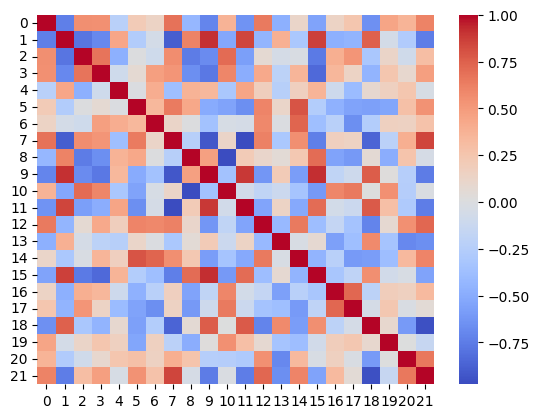

In [51]:
# On a donc nos 366 JOURS, exprimés chacune par une combinaison linéaire des 22 PCAs.
import seaborn as sns

sns.heatmap(pd.DataFrame(Xp).corr(), cmap = "coolwarm")

In [58]:
# Le taux de variance expliqué
pc_explained_variance_ratio = pd.DataFrame(pca.explained_variance_ratio_).T
pc_explained_variance_ratio.columns= [f'JOUR{i}' for i in range(1, Xp.shape[1] + 1)]
pc_explained_variance_ratio.index = ["ratio"]
pc_explained_variance_ratio

# RMQ : On observe qu'avec les composantes JOUR1 et JOUR2 (plus haut ratio), on arrive mieux à distinguer/séparer les données.

,JOUR1,JOUR2,JOUR3,JOUR4,JOUR5,JOUR6,JOUR7,JOUR8,JOUR9,JOUR10,...,JOUR13,JOUR14,JOUR15,JOUR16,JOUR17,JOUR18,JOUR19,JOUR20,JOUR21,JOUR22
ratio,0.409974,0.208764,0.064485,0.059628,0.045772,0.039095,0.029673,0.027996,0.025011,0.02238,...,0.010692,0.005507,0.00524,0.003808,0.002246,0.000792,0.000545,0.000409,0.000167,1.819758e-38


In [59]:
# Importances des Composantes Principales

# Calcul du ratio de la variance expliquée
# On observe que pour chaque colonne 
#(dont chaque valeur sont le résultat d'une combinaison linéaire et des composantes principales), 
# 1. la valeur de l'écart type est de moins en moins grande.

df_Xp = pd.DataFrame(Xp)
df_Xp.std()

0     2.328770e+01
1     7.673142e+01
2     1.807323e+01
3     1.166493e+01
4     1.162606e+01
5     2.192406e+01
6     6.116868e+01
7     6.113175e+01
8     5.466930e+01
9     3.919474e+01
10    3.025510e+01
11    3.799316e+01
12    7.122150e+00
13    1.437291e+01
14    8.217718e+00
15    8.868916e+00
16    3.017847e+00
17    3.527534e+00
18    2.097389e+00
19    1.492747e+00
20    6.591296e-01
21    1.186893e-15
dtype: float64

In [60]:
 
# 2. Calcule l'écart type au carré, pour obtenir la variance.

var = df_Xp.std() ** 2
var

0     5.423171e+02
1     5.887711e+03
2     3.266417e+02
3     1.360705e+02
4     1.351652e+02
5     4.806643e+02
6     3.741608e+03
7     3.737091e+03
8     2.988732e+03
9     1.536227e+03
10    9.153713e+02
11    1.443480e+03
12    5.072502e+01
13    2.065805e+02
14    6.753089e+01
15    7.865768e+01
16    9.107399e+00
17    1.244350e+01
18    4.399039e+00
19    2.228294e+00
20    4.344519e-01
21    1.408715e-30
dtype: float64

In [61]:
# 3 - En divisant la variance de chaque colonne, par le total de la variance des colonnes, j'obtiens un ratio de variance pour chaque colonne.


# Ratio de la variance expliquée
df_Xp.std()**2 / ((df_Xp.std()**2).sum())
     

0     2.431568e-02
1     2.639852e-01
2     1.464552e-02
3     6.100945e-03
4     6.060355e-03
5     2.155137e-02
6     1.677611e-01
7     1.675586e-01
8     1.340047e-01
9     6.887928e-02
10    4.104218e-02
11    6.472080e-02
12    2.274340e-03
13    9.262378e-03
14    3.027859e-03
15    3.526746e-03
16    4.083452e-04
17    5.579246e-04
18    1.972381e-04
19    9.990922e-05
20    1.947936e-05
21    6.316206e-35
dtype: float64

In [62]:
# On l'optient aussi simplement en fesant :

pca.explained_variance_ratio_

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 1.81975769e-38])

Text(0, 0.5, '% variance expliquée')

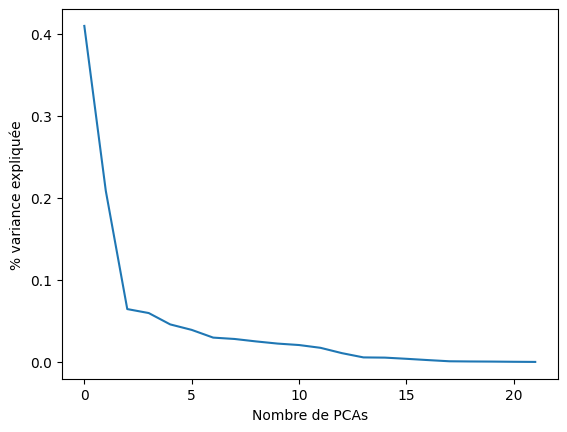

In [63]:
# La méthode du coude
# On peut utiliser la méthode du coude pour ne préserver que les PCA qui préservent le maximum d'informations pour notre modèle.
#La méthode du coude permet d'observer visuellement le taux de variance expliqué par Composante Principale.

import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Nombre de PCAs")
plt.ylabel("% variance expliquée")
     

Text(0, 0.5, '% variance expliquée')

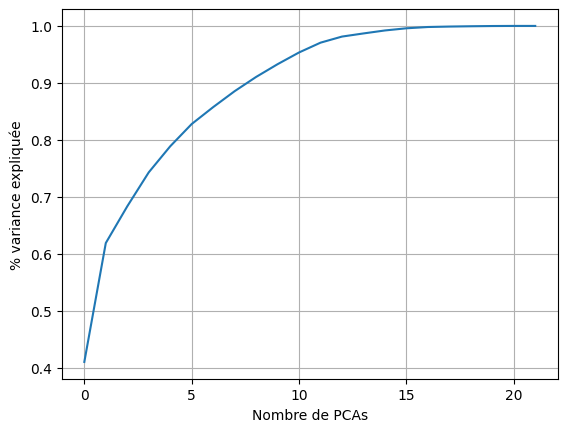

In [64]:
# On peut utilisé np.cumsum pour faire une somme cumulé. 
# On pourrait arbitrairement décider d'un compromis, avoir 80% de la variance expliquée. Dans ce cas, on exploitera que les 5 premières composantes principales.
# Les 5, et non les 4, car la première PC commence à 0.

import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.xlabel("Nombre de PCAs")
plt.ylabel("% variance expliquée")

6. Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca. Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION. Tu devrais obtenir un graphique de ce type :
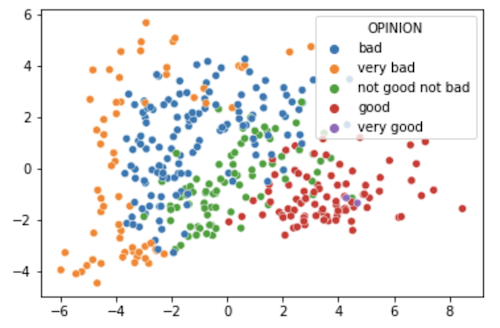

In [54]:
# Rappel : Entrainement du modèle PCA sur les données standardisées
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Transforme tes données grâce à pca.fit_transform(X_scaled), et stocke le résultat dans X_pca
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-2.979871,2.614537,2.885953,-1.093256,0.446893,0.422027,1.236378,-1.867595,0.358195,1.247557,...,0.282417,-0.553996,-0.108251,-0.055608,0.108640,0.038084,-0.020322,-0.054048,0.067765,-8.187070e-19
1,-2.695837,-0.063532,2.264262,-1.269339,0.061472,1.704212,0.077287,0.191445,-0.868456,-0.078018,...,0.598465,0.203289,-0.009875,-0.265036,-0.127926,-0.094051,0.022434,0.137241,-0.055734,-4.073915e-20
2,-2.314025,0.033466,2.006965,-1.448710,0.073870,1.752541,0.312680,-0.388901,-0.606726,-0.354332,...,0.222489,-0.133128,-0.294653,-0.175607,0.117286,-0.029352,-0.038246,0.009585,0.016228,-7.223813e-19
3,-3.367631,-3.240058,2.333096,-0.841262,0.777691,0.339900,0.238163,-0.567685,0.949341,0.051708,...,-0.225557,-0.725560,-0.246527,0.039729,0.302340,-0.012837,-0.072618,0.059794,0.037528,-5.546537e-19
4,-3.671390,-3.272882,1.977849,-0.946253,0.801887,0.366775,0.268295,-0.490423,0.820784,0.151842,...,-0.133630,-0.441365,-0.220775,-0.004650,0.136345,-0.014049,-0.031916,0.254673,-0.033655,-6.224630e-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-3.865098,3.527240,-2.561789,0.444999,-0.476753,-0.068809,-0.812177,2.332155,0.271108,0.788445,...,-0.082730,0.323772,-0.381433,0.055661,-0.482710,-0.092156,0.069841,-0.129893,-0.022039,1.816891e-19
362,-4.926436,2.679314,-3.909641,2.281753,0.109619,-1.233589,-1.559728,-0.083596,-0.696012,-0.695870,...,0.896275,-0.613195,-0.059511,-0.000025,-0.164011,-0.000074,-0.031776,0.050209,0.043789,1.074957e-20
363,-4.154275,0.095522,-1.315933,2.640078,-0.741728,-2.212112,-0.783306,-1.418760,-0.991096,-0.628554,...,-0.459642,-0.131476,-0.644010,0.035086,0.150550,0.068650,0.158465,-0.083271,-0.027803,-5.468175e-20
364,-4.438493,-1.484539,-0.881221,2.377764,-1.428553,-0.837347,-0.072660,0.172770,-0.228944,-0.919287,...,-0.198691,0.306994,-0.140210,0.015686,0.001630,0.035461,0.063448,-0.087671,0.007797,1.712605e-20


<Axes: xlabel='0', ylabel='1'>

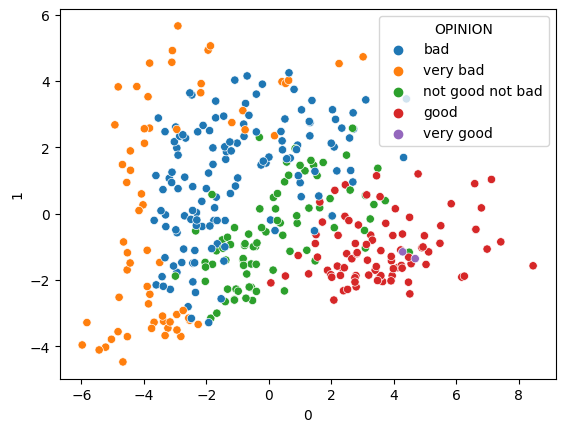

In [55]:
# Affiche sur une nuage de points les 2 premières colonnes (celles qui expliquent le plus de variance). Mets une couleur différente pour chaque OPINION
import seaborn as sns

X_pca['OPINION'] = y

sns.scatterplot(data = X_pca, x=0,y=1, hue='OPINION')

7. Lance une classification KNN sur X_scaled et y. Quel est ton score ? Lance une autre classification KNN sur les deux premières colonnes de X_pca et y. Le score est-il très différent ?

In [56]:
from sklearn.neighbors import KNeighborsClassifier
KNNC = KNeighborsClassifier()
KNNC.fit(X_scaled, y)

print(KNNC.score(X_scaled,y))

0.8661202185792349


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [57]:
KNNC.fit(X_pca.iloc[:,:2], y)

print(KNNC.score(X_pca.iloc[:,:2],y))

# RMQ : Le score est légèrement inférieur avec les deux premières composantes issues de l'ACP. 
# Cela s'explique certainement par le fait qu'elles n'expliquent qu'environ 60% de la variance du dataset d'origine. 
# Dans le premier modèle entraîné sur l'ensemble des données, 
# les features plus nombreuses (même si pas toutes 'importantes') apportent davantage de précision.

0.8469945355191257


# Conclusion

Grâce à PCA, on peut:

1. Obtenir des combinaisons linéaires plus puissantes que les features de base
2. Réduire la compléxité du modèle car moins de features

Cependant, il y a quelques limites:

1. On perd de l'information, et surtout, de l'interprétabilité.
2. Si on a vraiment besoin de préserver l'interprétabilité, il ne faut pas utiliser PCA.